## Optimal Discount Pricing

**Requirements:** 


In [1]:
from dwave.system import EmbeddingComposite, DWaveSampler
import neal
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt 

**Placeholder**: Randomly define bitstring of each cluster (bitstring length = # of products, # of bitstrings = # of clusters)

In [3]:
num_clusters = 1
num_columns = 6

bitstrings = set()
while len(bitstrings) < num_clusters:
    a = tuple(np.random.choice([0, 1], size=(num_columns)))
    if a not in bitstrings: bitstrings.add(a)
bitstrings = np.array([list(x) for x in bitstrings])
bitstrings = np.reshape(bitstrings, (bitstrings.shape[0], 1, bitstrings.shape[1]))

**For this case study, we simply set a sample bitstrings**

In [73]:
bitstrings = np.array([[[0, 1, 1, 1, 1, 1]]])

**Construct**: Create interaction dictionary per cluster bitstring

In [75]:
interact_dicts = []

for bis in bitstrings:
    interact = bis.T @ bis
    interact = interact - np.diagflat(np.diag(interact))
    interact = interact / bitstrings.shape[2]
    J = {(i, j) : col for i, row in enumerate(interact) for j, col in enumerate(row)}
    interact_dicts.append(J)

**Execute**: Execute annealing per interaction dictionary

In [76]:
solver=neal.SimulatedAnnealingSampler()

In [81]:
samples_across_Js = []
a = -0.1 
base = -0.1
h0 = {0:a, 1:a, 2:a, 3:a, 4:a, 5:a}
h1 = {0:base, 1:a, 2:base, 3:base, 4:base, 5:base}


j = 0
for J in [interact_dicts[0]]:
    sampleset = solver.sample_ising(h1, J,
                                 num_reads = 1000,
                                 label='Dynamic Quantum Pricing')
    samples_across_Js.append(sampleset)
    print(j)
    j = j + 1

0


**Results:**

In [82]:
pd_sampleset_0 = samples_across_Js[0].to_pandas_dataframe()
pd_sampleset_0

,0,1,2,3,4,5,energy,num_occurrences
0,1,1,-1,1,-1,1,-0.866667,1
1,1,1,1,-1,1,-1,-0.866667,1
2,1,1,1,-1,-1,1,-0.866667,1
3,1,-1,-1,1,1,1,-0.866667,1
4,1,-1,1,1,1,-1,-0.866667,1
...,...,...,...,...,...,...,...,...
995,1,-1,1,-1,1,1,-0.866667,1
996,1,-1,1,1,1,-1,-0.866667,1
997,1,1,1,-1,1,-1,-0.866667,1
998,1,-1,1,-1,1,1,-0.866667,1


In [83]:
pd_sampleset_0.sum(axis=0)

0                  1000.000000
1                   154.000000
2                   236.000000
3                   182.000000
4                   244.000000
5                   184.000000
energy             -866.666667
num_occurrences    1000.000000
dtype: float64

Text(0, 0.5, 'Buying Incentive')

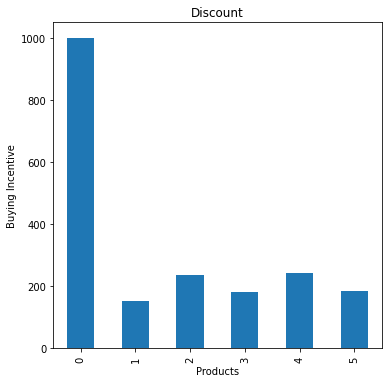

In [87]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
pd_sampleset_0.sum(axis=0)[:6].plot.bar()
plt.title('Discount')
plt.xlabel('Products')
plt.ylabel('Buying Incentive')

